# Logisitic Regression

# 1. Introduction

<p style="line-height:1.75;font-size:16px">
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. It is the goto method method for binary classification problems (although it can be adapted for multi-class problems as well). It is most suited for binary classification since, at its core, it uses the logistic function (or sigmoid function) which can take any real number and transform it into a value between 0 and 1. This is the probabilty of the input belonging to the default class. If the probability is > 0.5 we can take the output as a prediction for the default class, otherwise the prediction is for the other class.

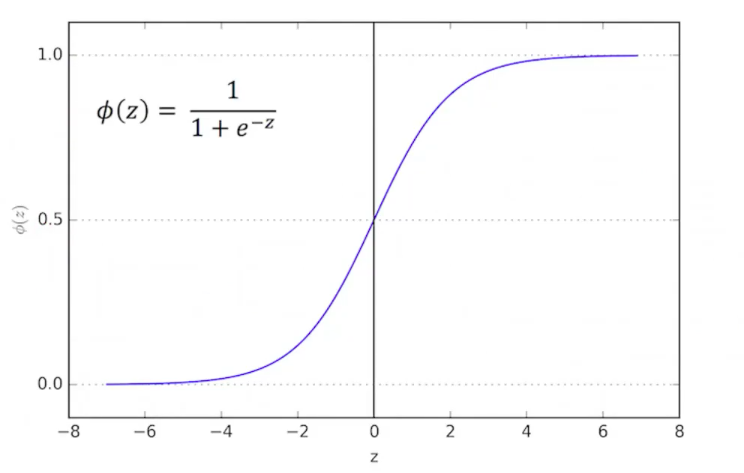

<p style="line-height:1.75;font-size:16px">
Logistic regression, similarly to linear regression, uses a linear equation for its model representation. The only difference is that instead of outputting the value of the equation, it will use the logistic function to transform it. Here's one example of a logistic regression model:
<center><h3>
$p=\frac{1}{1~+~e^{-(\beta_0 + \beta_1 x)}}$
</h3>
</center>

## Logistic Regression vs. Linear Regression

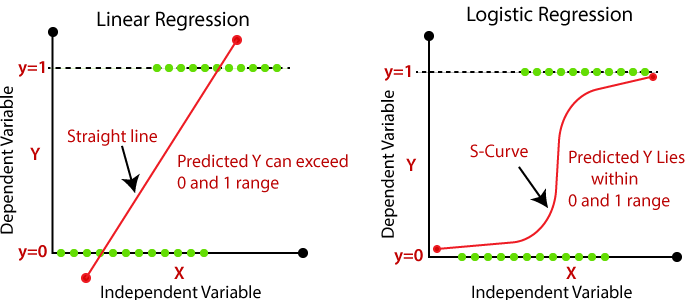

# 2. Log Odds

<p style="line-height:1.75;font-size:16px">
A central part in logistic regression is log odds. In a nutshell, using log odds lets us translate the probability we get from the sigmoid function to a log scale which will allow us to solve a linear equation (this will become clearer soon). We calculate the logs odds using:
<center><h3>
$log~odds=log(\frac{p}{1-p})$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
So, for instance, if we wanted to translate the a probability of 0.5 to our new scale:
<center><h3>
$log(\frac{0.5}{1-0.5})=log(1)=0$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
If, we wanted to translate the probability of 1:
<center><h3>
$log(\frac{1}{1-1})=log(1)-log(0)=0-(-\infty)=\infty$
</h3>
</center>

<p style="line-height:1.75;font-size:16px">
Let's consider what just happened here. Our range of probabilities between 0.5 and 1 were stretched out and are now between 0 and $\infty$. Similarly, our range of probabilites between 0 and 0.5 were also streched out and are now between 0 and $-\infty$. The s curve line has also changed and is now a straight line, which means it has a slope and an intercept - these are the coefficients we will see later on when applying logisitic regression.  

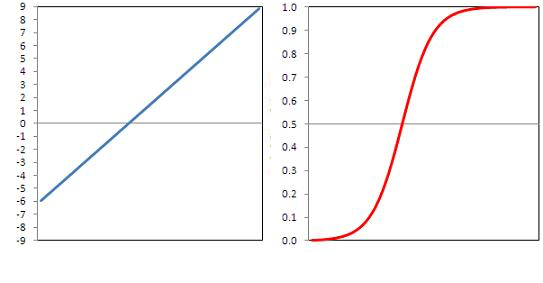

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Since we transformed our data to look more like linear regression, can we just fit a linear model now?
</p></div>

<p style="line-height:1.75;font-size:16px">
Recall that for linear regression we used the residuals to help us fit a line. In logisitic regression, however, our data points have a y value of $\infty$ and $-\infty$ which means that the residuals will also be $\infty$ and $-\infty$. Instead we use something called <b>maximum likelihood</b>.

# 3. Maximum Likelihood

<p style="line-height:1.75;font-size:16px">
Maximum likelihood tries to find the line that best fits our data by going through the following procedure:
<p style="line-height:1.75;font-size:16px">
1. Project all of our data point to the line we got in after tranforming our data from probabilities to log odds.
</p>

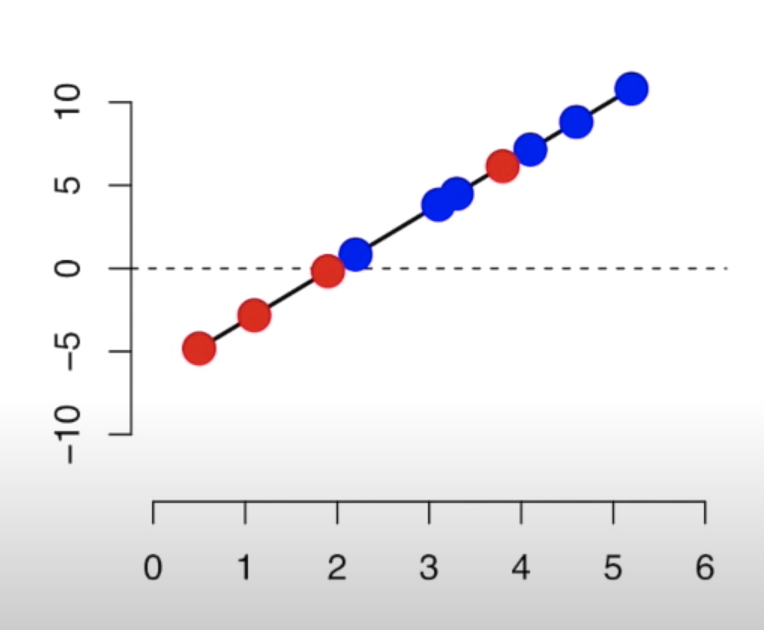

<p style="line-height:1.75;font-size:16px">
2\. For each point, transform its log odds value (y axis) back into a probability using:
</p>
<center><h3>
$p=\frac{e^{log(odds)}}{1+e^{log(odds)}}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
For example, a log odds value of 4 will become:
<center><h3>
$p=\frac{e^{4}}{1+e^{4}}=\frac{54.6}{1+54.6}=0.98$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
These values can then be drawn on the s curve:

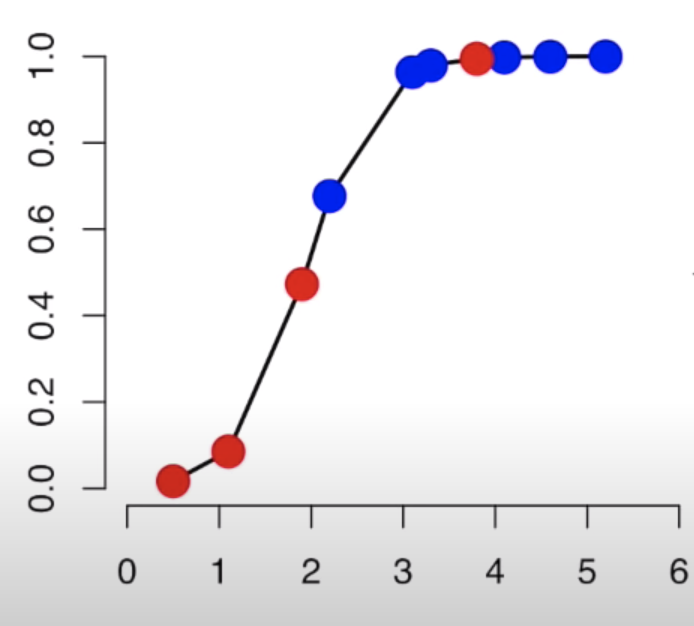

<p style="line-height:1.75;font-size:16px">
3\. Multiply the likelihood (probability) of each point in the positive class.<br>
<center><h3>
$positive=0.67\cdot 0.97\cdot 0.98 \cdot 0.99 \cdot 0.99$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
4\. Multiply the likelihood (1-probability) of each point in the negative class.
<center><h3>
$negative=(1-0.05)\cdot (1-0.1)\cdot (1-0.45) \cdot (1-0.98)$
</h3>
</center>
</p>
<p style="line-height:1.75;font-size:16px">
5\. Multiply the positive and negative likelihoods together. However, it's more common to use the log-likelihood rather the the likelihood itself so we can write:
<center><h3>
$log~likelihood=log(0.67)+log(0.97)+log(0.98)+log(0.99)+log(0.99)+log(1-0.05)+log(1-0.1)+log(1-0.45)+log(1-0.98)=-2.23$
</h3>
</center>
</p>
<p style="line-height:1.75;font-size:16px">
6\. Rotate the line a bit and repeat until we get the maximum log likelihood.
<p style="line-height:1.75;font-size:16px">
The maximum likelihood estimate can be written formally as:
<center><h3>
$MLE=\sum\limits_{i=1}^{n}y_ilog(p(x_i))+(1-y_i)log(1-p(x_i))$
</h3>
</center>
</p>

# Example Problem

<p style="line-height:1.75;font-size:16px">
Let's revisit our weights and heights data but this time, instead of predicting the weight given the height, we'll try to predict a person's gender given his weight.

## Get the Data

In [1]:
import pandas as pd

data = pd.read_csv('data/weight-height.csv')

inch_to_cm = 2.54
pound_to_kg = 0.453592

data['Height'] *= inch_to_cm
data['Weight'] *= pound_to_kg

data.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


## Fit the Model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train, test = train_test_split(data, train_size=0.8)

lr = LogisticRegression()

X_train = train[['Weight']]
y_train = train['Gender']

lr.fit(X_train, y_train)

LogisticRegression()

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = lr.predict(X_train)

cm = confusion_matrix(y_true=y_train,y_pred=y_pred)
pd.DataFrame(cm, index=lr.classes_, columns=lr.classes_)

,Female,Male
Female,3672,366
Male,376,3586


In [27]:
accuracy_score(y_train, y_pred)

0.907625

## Evaluate Results

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

X_test = test[['Weight']]
y_test = test['Gender']

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
pd.DataFrame(cm, index=lr.classes_, columns=lr.classes_)

,Female,Male
Female,858,104
Male,87,951


In [5]:
accuracy_score(y_test, y_pred)

0.9045

<p style="line-height:1.75;font-size:16px">
Remember that logistic regression is a probabilistic model so we can inspect the probabilities it assigns to each example.

In [6]:
gender_probs = pd.DataFrame(lr.predict_proba(X_train), columns=['P({})'.format(x) for x in lr.classes_], index=X_train.index)
X_train = X_train.join(gender_probs)
X_train.head()

,Weight,P(Female),P(Male)
1807,83.206162,0.044919,0.955081
958,87.315172,0.013405,0.986595
3646,86.553298,0.016817,0.983183
7466,60.595782,0.977590,0.022410
3466,82.502144,0.054982,0.945018


<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Create a new logistic regression that uses height to classify male or female. Report the confusion matrix and accuracy score. Is it better or worse than the previous model?<br>
</div>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

data = pd.read_csv('data/weight-height.csv')

inch_to_cm = 2.54
pound_to_kg = 0.453592

data['Height'] *= inch_to_cm
data['Weight'] *= pound_to_kg


train, test = train_test_split(data, train_size=0.8)

lr = LogisticRegression()

X_train = train[['Height']]
y_train = train['Gender']

X_test = test[['Height']]
y_test = test['Gender']


lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
pd.DataFrame(cm, index=lr.classes_, columns=lr.classes_)

Accuracy: 0.839


,Female,Male
Female,829,173
Male,149,849
